In [47]:
import numpy as np
import xarray as xray
import warnings
import gsw
import os
from scipy import io
from scipy import linalg as lin
from scipy import signal as sig
from scipy import fftpack as fft
from scipy import stats as stats
from scipy import interpolate as naiso
from itertools import product

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
basedir = '/data/scratch/takaya/POP_data/'

In [4]:
Ntwin = 280
Ntsum = 280

# Read in spectra

In [4]:
rotdiv_winternpz = np.load(os.path.join(basedir, 'POP_rotdiv_spectra_winter.npz'))
print rotdiv_winternpz.files
Kpsi_Kwin = rotdiv_winternpz['Kpsi_Kuro']
Kphi_Kwin = rotdiv_winternpz['Kphi_Kuro']
Kpsi_NKwin = rotdiv_winternpz['Kpsi_NK']
Kphi_NKwin = rotdiv_winternpz['Kphi_NK']
Kpsi_EPwin = rotdiv_winternpz['Kpsi_EP']
Kphi_EPwin = rotdiv_winternpz['Kphi_EP']
Kpsi_GSwin = rotdiv_winternpz['Kpsi_GS']
Kphi_GSwin = rotdiv_winternpz['Kphi_GS']
Kpsi_Sarwin = rotdiv_winternpz['Kpsi_Sar']
Kphi_Sarwin = rotdiv_winternpz['Kphi_Sar']
Kpsi_NEAtwin = rotdiv_winternpz['Kpsi_NEAt']
Kphi_NEAtwin = rotdiv_winternpz['Kphi_NEAt']
Kpsi_ACCwin = rotdiv_winternpz['Kpsi_ACC']
Kphi_ACCwin = rotdiv_winternpz['Kphi_ACC']
krotdiv_K = rotdiv_winternpz['k_Kuro']
krotdiv_NK = rotdiv_winternpz['k_NK']
krotdiv_EP = rotdiv_winternpz['k_EP']
krotdiv_GS = rotdiv_winternpz['k_GS']
krotdiv_Sar = rotdiv_winternpz['k_Sar']
krotdiv_NEAt = rotdiv_winternpz['k_NEAt']
krotdiv_ACC = rotdiv_winternpz['k_ACC']

['k_NK', 'k_GS', 'k_NEAt', 'k_EP', 'k_ACC', 'Kpsi_NEAt', 'Kphi_ACC', 'Kpsi_ACC', 'k_Kuro', 'Kpsi_NK', 'Kphi_Kuro', 'Kpsi_EP', 'Kphi_NK', 'Kpsi_Sar', 'Kpsi_Kuro', 'Kphi_GS', 'Kphi_Sar', 'Kpsi_GS', 'Kphi_EP', 'k_Sar', 'Kphi_NEAt']


In [5]:
rotdiv_summernpz = np.load(os.path.join(basedir, 'POP_rotdiv_spectra_summer.npz'))
print rotdiv_summernpz.files
Kpsi_Ksum = rotdiv_summernpz['Kpsi_Kuro']
Kphi_Ksum = rotdiv_summernpz['Kphi_Kuro']
Kpsi_NKsum = rotdiv_summernpz['Kpsi_NK']
Kphi_NKsum = rotdiv_summernpz['Kphi_NK']
Kpsi_EPsum = rotdiv_summernpz['Kpsi_EP']
Kphi_EPsum = rotdiv_summernpz['Kphi_EP']
Kpsi_GSsum = rotdiv_summernpz['Kpsi_GS']
Kphi_GSsum = rotdiv_summernpz['Kphi_GS']
Kpsi_Sarsum = rotdiv_summernpz['Kpsi_Sar']
Kphi_Sarsum = rotdiv_summernpz['Kphi_Sar']
Kpsi_NEAtsum = rotdiv_summernpz['Kpsi_NEAt']
Kphi_NEAtsum = rotdiv_summernpz['Kphi_NEAt']
Kpsi_ACCsum = rotdiv_summernpz['Kpsi_ACC']
Kphi_ACCsum = rotdiv_summernpz['Kphi_ACC']

['k_NK', 'k_GS', 'k_NEAt', 'k_EP', 'k_ACC', 'Kpsi_NEAt', 'Kphi_ACC', 'Kpsi_ACC', 'k_Kuro', 'Kpsi_NK', 'Kphi_Kuro', 'Kpsi_EP', 'Kphi_NK', 'Kpsi_Sar', 'Kpsi_Kuro', 'Kphi_GS', 'Kphi_Sar', 'Kpsi_GS', 'Kphi_EP', 'k_Sar', 'Kphi_NEAt']


In [6]:
ac_winternpz = np.load(os.path.join(basedir, 'POP_alongcross_spectra_winter.npz'))
print ac_winternpz.files
Cu_Kwin = ac_winternpz['Cu_Kuro']
Cv_Kwin = ac_winternpz['Cv_Kuro']
Cu_NKwin = ac_winternpz['Cu_NK']
Cv_NKwin = ac_winternpz['Cv_NK']
Cu_EPwin = ac_winternpz['Cu_EP']
Cv_EPwin = ac_winternpz['Cv_EP']
Cu_GSwin = ac_winternpz['Cu_GS']
Cv_GSwin = ac_winternpz['Cv_GS']
Cu_Sarwin = ac_winternpz['Cu_Sar']
Cv_Sarwin = ac_winternpz['Cv_Sar']
Cu_NEAtwin = ac_winternpz['Cu_NEAt']
Cv_NEAtwin = ac_winternpz['Cv_NEAt']
Cu_ACCwin = ac_winternpz['Cu_ACC']
Cv_ACCwin = ac_winternpz['Cv_ACC']
kac_K = ac_winternpz['k_Kuro']
kac_NK = ac_winternpz['k_NK']
kac_EP = ac_winternpz['k_EP']
kac_GS = ac_winternpz['k_GS']
kac_Sar = ac_winternpz['k_Sar']
kac_NEAt = ac_winternpz['k_NEAt']
kac_ACC = ac_winternpz['k_ACC']

['k_GS', 'k_ACC', 'k_NEAt', 'Cu_NK', 'Cv_Kuro', 'Cu_Sar', 'Cv_NEAt', 'k_Kuro', 'Cv_ACC', 'Cu_ACC', 'Cv_Sar', 'Cu_GS', 'Cu_Kuro', 'k_NK', 'Cv_GS', 'Cv_NK', 'k_EP', 'Cu_NEAt', 'Cu_EP', 'Cv_EP', 'k_Sar']


In [7]:
ac_summernpz = np.load(os.path.join(basedir, 'POP_alongcross_spectra_summer.npz'))
print ac_summernpz.files
Cu_Ksum = ac_summernpz['Cu_Kuro']
Cv_Ksum = ac_summernpz['Cv_Kuro']
Cu_NKsum = ac_summernpz['Cu_NK']
Cv_NKsum = ac_summernpz['Cv_NK']
Cu_EPsum = ac_summernpz['Cu_EP']
Cv_EPsum = ac_summernpz['Cv_EP']
Cu_GSsum = ac_summernpz['Cu_GS']
Cv_GSsum = ac_summernpz['Cv_GS']
Cu_Sarsum = ac_summernpz['Cu_Sar']
Cv_Sarsum = ac_summernpz['Cv_Sar']
Cu_NEAtsum = ac_summernpz['Cu_NEAt']
Cv_NEAtsum = ac_summernpz['Cv_NEAt']
Cu_ACCsum = ac_summernpz['Cu_ACC']
Cv_ACCsum = ac_summernpz['Cv_ACC']

['k_GS', 'k_ACC', 'k_NEAt', 'Cu_NK', 'Cv_Kuro', 'Cu_Sar', 'Cv_NEAt', 'k_Kuro', 'Cv_ACC', 'Cu_ACC', 'Cv_Sar', 'Cu_GS', 'Cu_Kuro', 'k_NK', 'Cv_GS', 'Cv_NK', 'k_EP', 'Cu_NEAt', 'Cu_EP', 'Cv_EP', 'k_Sar']


In [20]:
Kurowinternpz = np.load(os.path.join(basedir, 'IsotropicSpectra_Kuroshio_winter.npz'))
print Kurowinternpz.files
uPSD_Kwin = Kurowinternpz['isoPSD_u'] / Ntwin
vPSD_Kwin = Kurowinternpz['isoPSD_v'] / Ntwin
sstPSD_Kwin = Kurowinternpz['isoPSD_sst'] / Ntwin
sssPSD_Kwin = Kurowinternpz['isoPSD_sss'] / Ntwin
sshPSD_Kwin = Kurowinternpz['isoPSD_ssh'] / Ntwin
NrU_Kwin = Kurowinternpz['NrU']
NrT_Kwin = Kurowinternpz['NrT']
k_Kuro = Kurowinternpz['K']

['isoPSD_u', 'isoPSD_v', 'isoPSD_ssh', 'K', 'isoPSD_sss', 'isoPSD_sst', 'NrU', 'NrT']


In [5]:
NKwinternpz = np.load(os.path.join(basedir, 'IsotropicSpectra_NorthofKuroshio_winter.npz'))
uPSD_NKwin = NKwinternpz['isoPSD_u'] / Ntwin
vPSD_NKwin = NKwinternpz['isoPSD_v'] / Ntwin
sstPSD_NKwin = NKwinternpz['isoPSD_sst'] / Ntwin
sssPSD_NKwin = NKwinternpz['isoPSD_sss'] / Ntwin
sshPSD_NKwin = NKwinternpz['isoPSD_ssh'] / Ntwin
NrU_NKwin = NKwinternpz['NrU']
NrT_NKwin = NKwinternpz['NrT']
k_NK = NKwinternpz['K']

In [6]:
EPwinternpz = np.load(os.path.join(basedir, 'IsotropicSpectra_EastPacific_winter.npz'))
uPSD_EPwin = EPwinternpz['isoPSD_u'] / Ntwin
vPSD_EPwin = EPwinternpz['isoPSD_v'] / Ntwin
sstPSD_EPwin = EPwinternpz['isoPSD_sst'] / Ntwin
sssPSD_EPwin = EPwinternpz['isoPSD_sss'] / Ntwin
sshPSD_EPwin = EPwinternpz['isoPSD_ssh'] / Ntwin
NrU_EPwin = EPwinternpz['NrU']
NrT_EPwin = EPwinternpz['NrT']
k_EP = EPwinternpz['K']

In [7]:
GSwinternpz = np.load(os.path.join(basedir, 'IsotropicSpectra_GulfStream_winter.npz'))
uPSD_GSwin = GSwinternpz['isoPSD_u'] / Ntwin
vPSD_GSwin = GSwinternpz['isoPSD_v'] / Ntwin
sstPSD_GSwin = GSwinternpz['isoPSD_sst'] / Ntwin
sssPSD_GSwin = GSwinternpz['isoPSD_sss'] / Ntwin
sshPSD_GSwin = GSwinternpz['isoPSD_ssh'] / Ntwin
NrU_GSwin = GSwinternpz['NrU']
NrT_GSwin = GSwinternpz['NrT']
k_GS = GSwinternpz['K'] 

In [8]:
Sarwinternpz = np.load(os.path.join(basedir, 'IsotropicSpectra_SargassoSea_winter.npz'))
uPSD_Sarwin = Sarwinternpz['isoPSD_u'] / Ntwin
vPSD_Sarwin = Sarwinternpz['isoPSD_v'] / Ntwin
sstPSD_Sarwin = Sarwinternpz['isoPSD_sst'] / Ntwin
sssPSD_Sarwin = Sarwinternpz['isoPSD_sss'] / Ntwin
sshPSD_Sarwin = Sarwinternpz['isoPSD_ssh'] / Ntwin
NrU_Sarwin = Sarwinternpz['NrU']
NrT_Sarwin = Sarwinternpz['NrT']
k_Sar = Sarwinternpz['K']

In [9]:
NEAtwinternpz = np.load(os.path.join(basedir, 'IsotropicSpectra_NortheastAtlantic_winter.npz'))
uPSD_NEAtwin = NEAtwinternpz['isoPSD_u'] / Ntwin
vPSD_NEAtwin = NEAtwinternpz['isoPSD_v'] / Ntwin
sstPSD_NEAtwin = NEAtwinternpz['isoPSD_sst'] / Ntwin
sssPSD_NEAtwin = NEAtwinternpz['isoPSD_sss'] / Ntwin
sshPSD_NEAtwin = NEAtwinternpz['isoPSD_ssh'] / Ntwin
NrU_NEAtwin = NEAtwinternpz['NrU']
NrT_NEAtwin = NEAtwinternpz['NrT']
k_NEAt = NEAtwinternpz['K']

In [10]:
ACCwinternpz = np.load(os.path.join(basedir, 'IsotropicSpectra_ACC_winter.npz'))
uPSD_ACCwin = ACCwinternpz['isoPSD_u'] / Ntwin
vPSD_ACCwin = ACCwinternpz['isoPSD_v'] / Ntwin
sstPSD_ACCwin = ACCwinternpz['isoPSD_sst'] / Ntwin
sssPSD_ACCwin = ACCwinternpz['isoPSD_sss'] / Ntwin
sshPSD_ACCwin = ACCwinternpz['isoPSD_ssh'] / Ntwin
NrU_ACCwin = ACCwinternpz['NrU']
NrT_ACCwin = ACCwinternpz['NrT']
k_ACC = ACCwinternpz['K']

In [11]:
Kurosummernpz = np.load(os.path.join(basedir, 'IsotropicSpectra_Kuroshio_summer.npz'))
print Kurosummernpz.files
uPSD_Ksum = Kurosummernpz['isoPSD_u'] / Ntsum
vPSD_Ksum = Kurosummernpz['isoPSD_v'] / Ntsum
sstPSD_Ksum = Kurosummernpz['isoPSD_sst'] / Ntsum
sssPSD_Ksum = Kurosummernpz['isoPSD_sss'] / Ntsum
sshPSD_Ksum = Kurosummernpz['isoPSD_ssh'] / Ntsum
NrU_Ksum = Kurosummernpz['NrU']
NrT_Ksum = Kurosummernpz['NrT']

['isoPSD_u', 'isoPSD_v', 'isoPSD_ssh', 'K', 'isoPSD_sss', 'isoPSD_sst', 'NrU', 'NrT']


In [12]:
NKsummernpz = np.load(os.path.join(basedir, 'IsotropicSpectra_NorthofKuroshio_summer.npz'))
uPSD_NKsum = NKsummernpz['isoPSD_u'] / Ntsum
vPSD_NKsum = NKsummernpz['isoPSD_v'] / Ntsum
sstPSD_NKsum = NKsummernpz['isoPSD_sst'] / Ntsum
sssPSD_NKsum = NKsummernpz['isoPSD_sss'] / Ntsum
sshPSD_NKsum = NKsummernpz['isoPSD_ssh'] / Ntsum
NrU_NKsum = NKsummernpz['NrU']
NrT_NKsum = NKsummernpz['NrT']

In [13]:
EPsummernpz = np.load(os.path.join(basedir, 'IsotropicSpectra_EastPacific_summer.npz'))
uPSD_EPsum = EPsummernpz['isoPSD_u'] / Ntsum
vPSD_EPsum = EPsummernpz['isoPSD_v'] / Ntsum
sstPSD_EPsum = EPsummernpz['isoPSD_sst'] / Ntsum
sssPSD_EPsum = EPsummernpz['isoPSD_sss'] / Ntsum
sshPSD_EPsum = EPsummernpz['isoPSD_ssh'] / Ntsum
NrU_EPsum = EPsummernpz['NrU']
NrT_EPsum = EPsummernpz['NrT']

In [14]:
GSsummernpz = np.load(os.path.join(basedir, 'IsotropicSpectra_GulfStream_summer.npz'))
uPSD_GSsum = GSsummernpz['isoPSD_u'] / Ntsum
vPSD_GSsum = GSsummernpz['isoPSD_v'] / Ntsum
sstPSD_GSsum = GSsummernpz['isoPSD_sst'] / Ntsum
sssPSD_GSsum = GSsummernpz['isoPSD_sss'] / Ntsum
sshPSD_GSsum = GSsummernpz['isoPSD_ssh'] / Ntsum
NrU_GSsum = GSsummernpz['NrU']
NrT_GSsum = GSsummernpz['NrT']

In [15]:
Sarsummernpz = np.load(os.path.join(basedir, 'IsotropicSpectra_SargassoSea_summer.npz'))
uPSD_Sarsum = Sarsummernpz['isoPSD_u'] / Ntsum
vPSD_Sarsum = Sarsummernpz['isoPSD_v'] / Ntsum
sstPSD_Sarsum = Sarsummernpz['isoPSD_sst'] / Ntsum
sssPSD_Sarsum = Sarsummernpz['isoPSD_sss'] / Ntsum
sshPSD_Sarsum = Sarsummernpz['isoPSD_ssh'] / Ntsum
NrU_Sarsum = Sarsummernpz['NrU']
NrT_Sarsum = Sarsummernpz['NrT']

In [16]:
NEAtsummernpz = np.load(os.path.join(basedir, 'IsotropicSpectra_NortheastAtlantic_summer.npz'))
uPSD_NEAtsum = NEAtsummernpz['isoPSD_u'] / Ntsum
vPSD_NEAtsum = NEAtsummernpz['isoPSD_v'] / Ntsum
sstPSD_NEAtsum = NEAtsummernpz['isoPSD_sst'] / Ntsum
sssPSD_NEAtsum = NEAtsummernpz['isoPSD_sss'] / Ntsum
sshPSD_NEAtsum = NEAtsummernpz['isoPSD_ssh'] / Ntsum
NrU_NEAtsum = NEAtsummernpz['NrU']
NrT_NEAtsum = NEAtsummernpz['NrT']

In [17]:
ACCsummernpz = np.load(os.path.join(basedir, 'IsotropicSpectra_ACC_summer.npz'))
uPSD_ACCsum = ACCsummernpz['isoPSD_u'] / Ntsum
vPSD_ACCsum = ACCsummernpz['isoPSD_v'] / Ntsum
sstPSD_ACCsum = ACCsummernpz['isoPSD_sst'] / Ntsum
sssPSD_ACCsum = ACCsummernpz['isoPSD_sss'] / Ntsum
sshPSD_ACCsum = ACCsummernpz['isoPSD_ssh'] / Ntsum
NrU_ACCsum = ACCsummernpz['NrU']
NrT_ACCsum = ACCsummernpz['NrT']

## Read in dissipation spectra

In [18]:
Kurodisswinnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_Kuroshio_winter.npz'))
udissPSD_Kurowin = Kurodisswinnpz['isoPSD_udiss'] / Ntwin
vdissPSD_Kurowin = Kurodisswinnpz['isoPSD_vdiss'] / Ntwin

Kurodisssumnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_Kuroshio_summer.npz'))
udissPSD_Kurosum = Kurodisssumnpz['isoPSD_udiss'] / Ntsum
vdissPSD_Kurosum = Kurodisssumnpz['isoPSD_vdiss'] / Ntsum


NKdisswinnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_NorthofKuroshio_winter.npz'))
udissPSD_NKwin = NKdisswinnpz['isoPSD_udiss'] / Ntwin
vdissPSD_NKwin = NKdisswinnpz['isoPSD_vdiss'] / Ntwin

NKdisssumnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_NorthofKuroshio_summer.npz'))
udissPSD_NKsum = NKdisssumnpz['isoPSD_udiss'] / Ntsum
vdissPSD_NKsum = NKdisssumnpz['isoPSD_vdiss'] / Ntsum


EPdisswinnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_EastPacific_winter.npz'))
udissPSD_EPwin = EPdisswinnpz['isoPSD_udiss'] / Ntwin
vdissPSD_EPwin = EPdisswinnpz['isoPSD_vdiss'] / Ntwin

EPdisssumnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_EastPacific_summer.npz'))
udissPSD_EPsum = EPdisssumnpz['isoPSD_udiss'] / Ntsum
vdissPSD_EPsum = EPdisssumnpz['isoPSD_vdiss'] / Ntsum


GSdisswinnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_GulfStream_winter.npz'))
udissPSD_GSwin = GSdisswinnpz['isoPSD_udiss'] / Ntwin
vdissPSD_GSwin = GSdisswinnpz['isoPSD_vdiss'] / Ntwin

GSdisssumnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_GulfStream_summer.npz'))
udissPSD_GSsum = GSdisssumnpz['isoPSD_udiss'] / Ntsum
vdissPSD_GSsum = GSdisssumnpz['isoPSD_vdiss'] / Ntsum


Sardisswinnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_SargassoSea_winter.npz'))
udissPSD_Sarwin = Sardisswinnpz['isoPSD_udiss'] / Ntwin
vdissPSD_Sarwin = Sardisswinnpz['isoPSD_vdiss'] / Ntwin

Sardisssumnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_SargassoSea_summer.npz'))
udissPSD_Sarsum = Sardisssumnpz['isoPSD_udiss'] / Ntsum
vdissPSD_Sarsum = Sardisssumnpz['isoPSD_vdiss'] / Ntsum


NEAtdisswinnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_NortheastAtlantic_winter.npz'))
udissPSD_NEAtwin = NEAtdisswinnpz['isoPSD_udiss'] / Ntwin
vdissPSD_NEAtwin = NEAtdisswinnpz['isoPSD_vdiss'] / Ntwin

NEAtdisssumnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_NortheastAtlantic_summer.npz'))
udissPSD_NEAtsum = NEAtdisssumnpz['isoPSD_udiss'] / Ntsum
vdissPSD_NEAtsum = NEAtdisssumnpz['isoPSD_vdiss'] / Ntsum


ACCdisswinnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_ACC_winter.npz'))
udissPSD_ACCwin = ACCdisswinnpz['isoPSD_udiss'] / Ntwin
vdissPSD_ACCwin = ACCdisswinnpz['isoPSD_vdiss'] / Ntwin

ACCdisssumnpz = np.load(os.path.join(basedir, 'IsotropicDissipationSpectra_ACC_summer.npz'))
udissPSD_ACCsum = ACCdisssumnpz['isoPSD_udiss'] / Ntsum
vdissPSD_ACCsum = ACCdisssumnpz['isoPSD_vdiss'] / Ntsum

# Start plotting

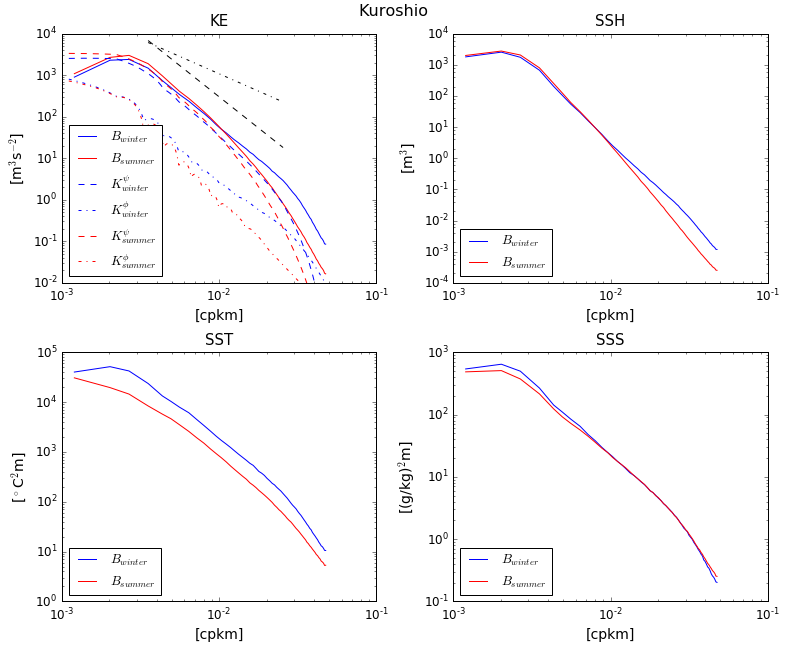

In [29]:
fig = plt.figure(figsize=(11,9))

ax1 = fig.add_subplot(221)
ax1.loglog(k_Kuro[:-1]*1e3, 2*.5*(uPSD_Kwin + vPSD_Kwin)[:-1], 'b', label=r'$B_{winter}$')
ax1.loglog(k_Kuro[:-1]*1e3, 2*.5*(uPSD_Ksum + vPSD_Ksum)[:-1], 'r', label=r'$B_{summer}$')
ax1.loglog(k_Kuro[5:35]*1e3, k_Kuro[5:35]**-3*3e-13, 'k--')
ax1.loglog(k_Kuro[5:35]*1e3, k_Kuro[5:35]**(-5./3.)*5e-6, 'k-.')
ax1.loglog(krotdiv_K[:]*1e3, Kpsi_Kwin[:], 'b--', label=r'$K^{\psi}_{winter}$')
ax1.loglog(krotdiv_K[:]*1e3, Kphi_Kwin[:], 'b-.', label=r'$K^{\phi}_{winter}$')
ax1.loglog(krotdiv_K[:]*1e3, Kpsi_Ksum[:], 'r--', label=r'$K^{\psi}_{summer}$')
ax1.loglog(krotdiv_K[:]*1e3, Kphi_Ksum[:], 'r-.', label=r'$K^{\phi}_{summer}$')
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax2 = fig.add_subplot(222)
ax2.loglog(k_Kuro[:-1]*1e3, 2*sshPSD_Kwin[:-1], 'b', label=r'$B_{winter}$')
ax2.loglog(k_Kuro[:-1]*1e3, 2*sshPSD_Ksum[:-1], 'r', label=r'$B_{summer}$')
ax2.set_title(r'SSH', fontsize=15, y=1.01)
ax2.set_xlabel(r'[cpkm]', fontsize=14)
ax2.set_ylabel(r'[m$^3$]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax3 = fig.add_subplot(223)
ax3.loglog(k_Kuro[:-1]*1e3, 2*sstPSD_Kwin[:-1], 'b', label=r'$B_{winter}$')
ax3.loglog(k_Kuro[:-1]*1e3, 2*sstPSD_Ksum[:-1], 'r', label=r'$B_{summer}$')
ax3.set_title(r'SST', fontsize=15, y=1.01)
ax3.set_xlabel(r'[cpkm]', fontsize=14)
ax3.set_ylabel(r'[$^\circ$C$^2$m]', fontsize=14)
ax3.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax4 = fig.add_subplot(224)
ax4.loglog(k_Kuro[:-1]*1e3, 2*sssPSD_Kwin[:-1], 'b', label=r'$B_{winter}$')
ax4.loglog(k_Kuro[:-1]*1e3, 2*sssPSD_Ksum[:-1], 'r', label=r'$B_{summer}$')
ax4.set_title(r'SSS', fontsize=15, y=1.01)
ax4.set_xlabel(r'[cpkm]', fontsize=14)
ax4.set_ylabel(r'[(g/kg)$^2$m]', fontsize=14)
ax4.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

# plt.subplots_adjust(top=2.01)
# plt.suptitle('Kuroshio', fontsize=16)
fig.get_axes()[0].annotate('Kuroshio', (0.5, 0.975), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
plt.tight_layout()
plt.savefig('Kuroshio_spectra_seasonal.png', box_axis='tight')

In [62]:
k_Kuronew = np.logspace(np.log10(np.nanmin(k_Kuro[2:-1])), np.log10(np.nanmax(k_Kuro[2:-1])), num=100)

f = naiso.interp1d(k_Kuro[2:-1], (uPSD_Kwin + vPSD_Kwin)[2:-1])
KE_specKwin = f(k_Kuronew)
f = naiso.interp1d(k_Kuro[2:-1], (udissPSD_Kurowin + vdissPSD_Kurowin)[2:-1])
KEdiss_specKwin = f(k_Kuronew)

f = naiso.interp1d(k_Kuro[2:-1], (uPSD_Ksum + vPSD_Ksum)[2:-1])
KE_specKsum = f(k_Kuronew)
f = naiso.interp1d(k_Kuro[2:-1], (udissPSD_Kurosum + vdissPSD_Kurosum)[2:-1])
KEdiss_specKsum = f(k_Kuronew)

In [63]:
print k_Kuro[2:-1], np.log10(np.nanmin(k_Kuro[1:-1]))

[  1.19793409e-06   2.02076267e-06   2.66815554e-06   3.53140222e-06
   4.34879229e-06   4.93389127e-06   5.58170844e-06   6.40492094e-06
   7.20736949e-06   7.98940781e-06   8.80829617e-06   9.59904773e-06
   1.03011429e-05   1.10914099e-05   1.18427781e-05   1.24782180e-05
   1.32874296e-05   1.41326236e-05   1.49079105e-05   1.56717285e-05
   1.64465912e-05   1.71675399e-05   1.78699634e-05   1.86107017e-05
   1.93698447e-05   2.01588317e-05   2.09643104e-05   2.17381952e-05
   2.24772217e-05   2.32539307e-05   2.40023793e-05   2.47127554e-05
   2.54938507e-05   2.62831746e-05   2.70208799e-05   2.78060969e-05
   2.86060227e-05   2.93361588e-05   3.01024474e-05   3.08521702e-05
   3.15656594e-05   3.23587081e-05   3.31456815e-05   3.38803209e-05
   3.46385854e-05   3.54452628e-05   3.61906544e-05   3.68868467e-05
   3.76762018e-05   3.84746925e-05   3.91804132e-05   3.99415195e-05
   4.07606059e-05   4.14934490e-05   4.22406191e-05   4.30315440e-05
   4.37705610e-05   4.45331470e-05

In [64]:
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specKwin[ik:])
                                 /np.nansum(KEdiss_specKwin)) - .8)
    if diff > 0.:
        ik_Kwin = ik
        break
        
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specKsum[ik:])
                                 /np.nansum(KEdiss_specKsum)) - .8)
    if diff > 0.:
        ik_Ksum = ik
        break

print ik_Kwin, ik_Ksum

42 38


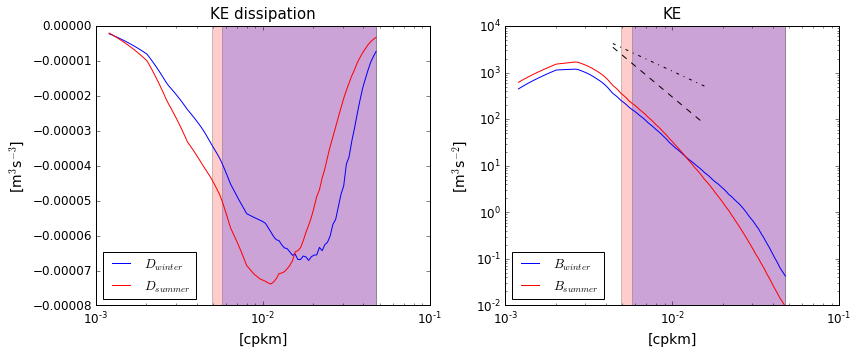

In [77]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax1.semilogx(k_Kuronew*1e3, .5*KEdiss_specKwin, 'b', label=r'$D_{winter}$')
ax1.semilogx(k_Kuronew*1e3, .5*KEdiss_specKsum, 'r', label=r'$D_{summer}$')
ax1.fill_between(k_Kuronew[ik_Ksum:]*1e3, 
                 np.zeros(len(k_Kuronew[ik_Ksum:])), -8e-5*np.ones(len(k_Kuronew[ik_Ksum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_Kuronew[ik_Kwin:]*1e3, 
                 np.zeros(len(k_Kuronew[ik_Kwin:])), -8e-5*np.ones(len(k_Kuronew[ik_Kwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE dissipation', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-3}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([-8e-5, 0.])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax1 = fig.add_subplot(122)
ax1.loglog(k_Kuronew*1e3, .5*KE_specKwin, 'b', label=r'$B_{winter}$')
ax1.loglog(k_Kuronew*1e3, .5*KE_specKsum, 'r', label=r'$B_{summer}$')
ax1.loglog(k_Kuronew[35:70]*1e3, k_Kuronew[35:70]**-3*3e-13, 'k--')
ax1.loglog(k_Kuronew[35:70]*1e3, k_Kuronew[35:70]**(-5./3.)*5e-6, 'k-.')
ax1.fill_between(k_Kuronew[ik_Ksum:]*1e3, 
                 1e-2*np.ones(len(k_Kuronew[ik_Ksum:])), 1e4*np.ones(len(k_Kuronew[ik_Ksum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_Kuronew[ik_Kwin:]*1e3, 
                 1e-2*np.ones(len(k_Kuronew[ik_Kwin:])), 1e4*np.ones(len(k_Kuronew[ik_Kwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

plt.tight_layout()

In [63]:
dkac_K = np.diff(kac_K)

Cv_KwinDev = - .5*(kac_K[1:]+kac_K[:-1]) * np.diff(Cu_Kwin) * dkac_K**-1
Cv_KsumDev = - .5*(kac_K[1:]+kac_K[:-1]) * np.diff(Cu_Ksum) * dkac_K**-1

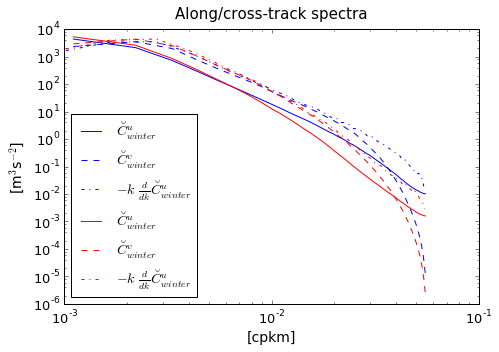

In [82]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca()
ax.loglog(kac_K*1e3, Cu_Kwin, 'b', label=r'$\breve{C}^u_{winter}$')
ax.loglog(kac_K*1e3, Cv_Kwin, 'b--', label=r'$\breve{C}^v_{winter}$')
ax.loglog(.5*(kac_K[1:]+kac_K[:-1])*1e3, Cv_KwinDev, 'b-.', label=r'$-k\ \frac{d}{dk}\breve{C}^u_{winter}$')
ax.loglog(kac_K*1e3, Cu_Ksum, 'r', label=r'$\breve{C}^u_{winter}$')
ax.loglog(kac_K*1e3, Cv_Ksum, 'r--', label=r'$\breve{C}^v_{winter}$')
ax.loglog(.5*(kac_K[1:]+kac_K[:-1])*1e3, Cv_KsumDev, 'r-.', label=r'$-k\ \frac{d}{dk}\breve{C}^u_{winter}$')
ax.set_xlabel(r'[cpkm]', fontsize=14)
ax.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
# ax.set_ylim([1e-2, 1e4])
ax.set_xlim([1e-3, 1e-1])
ax.set_title('Along/cross-track spectra', fontsize=15, y=1.02)
plt.legend(loc='lower left', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.savefig('Kuroshio_alongcrossSpectra_seasonal.png')

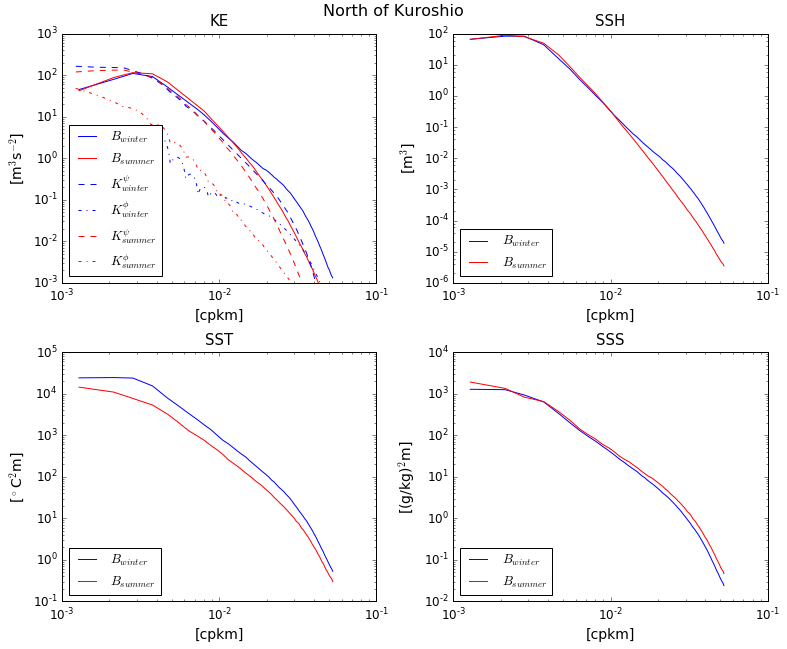

In [112]:
fig = plt.figure(figsize=(11,9))

ax1 = fig.add_subplot(221)
ax1.loglog(k_NK[:-1]*1e3, 2*.5*(uPSD_NKwin + vPSD_NKwin)[:-1], 'b', label=r'$B_{winter}$')
ax1.loglog(k_NK[:-1]*1e3, 2*.5*(uPSD_NKsum + vPSD_NKsum)[:-1], 'r', label=r'$B_{summer}$')
ax1.loglog(krotdiv_NK[:]*1e3, Kpsi_NKwin[:], 'b--', label=r'$K^{\psi}_{winter}$')
ax1.loglog(krotdiv_NK[:]*1e3, Kphi_NKwin[:], 'b-.', label=r'$K^{\phi}_{winter}$')
ax1.loglog(krotdiv_NK[:]*1e3, Kpsi_NKsum[:], 'r--', label=r'$K^{\psi}_{summer}$')
ax1.loglog(krotdiv_NK[:]*1e3, Kphi_NKsum[:], 'r-.', label=r'$K^{\phi}_{summer}$')
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-3, 1e3])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax2 = fig.add_subplot(222)
ax2.loglog(k_NK[:-1]*1e3, 2*sshPSD_NKwin[:-1], 'b', label=r'$B_{winter}$')
ax2.loglog(k_NK[:-1]*1e3, 2*sshPSD_NKsum[:-1], 'r', label=r'$B_{summer}$')
ax2.set_title(r'SSH', fontsize=15, y=1.01)
ax2.set_xlabel(r'[cpkm]', fontsize=14)
ax2.set_ylabel(r'[m$^3$]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax3 = fig.add_subplot(223)
ax3.loglog(k_NK[:-1]*1e3, 2*sstPSD_NKwin[:-1], 'b', label=r'$B_{winter}$')
ax3.loglog(k_NK[:-1]*1e3, 2*sstPSD_NKsum[:-1], 'r', label=r'$B_{summer}$')
ax3.set_title(r'SST', fontsize=15, y=1.01)
ax3.set_xlabel(r'[cpkm]', fontsize=14)
ax3.set_ylabel(r'[$^\circ$C$^2$m]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax4 = fig.add_subplot(224)
ax4.loglog(k_NK[:-1]*1e3, 2*sssPSD_NKwin[:-1], 'b', label=r'$B_{winter}$')
ax4.loglog(k_NK[:-1]*1e3, 2*sssPSD_NKsum[:-1], 'r', label=r'$B_{summer}$')
ax4.set_title(r'SSS', fontsize=15, y=1.01)
ax4.set_xlabel(r'[cpkm]', fontsize=14)
ax4.set_ylabel(r'[(g/kg)$^2$m]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

# plt.suptitle('North of Kuroshio', fontsize=16, y=1.01)
fig.get_axes()[0].annotate('North of Kuroshio', (0.5, 0.975), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
plt.tight_layout()
plt.savefig('NorthofKuroshio_spectra_seasonal.png', box_axis='tight')

In [81]:
k_NKnew = np.logspace(np.log10(np.nanmin(k_NK[2:-1])), np.log10(np.nanmax(k_NK[2:-1])), num=100)

f = naiso.interp1d(k_NK[2:-1], (uPSD_NKwin + vPSD_NKwin)[2:-1], fill_value='extrapolate')
KE_specNKwin = f(k_NKnew)
f = naiso.interp1d(k_NK[2:-1], (udissPSD_NKwin + vdissPSD_NKwin)[2:-1], fill_value='extrapolate')
KEdiss_specNKwin = f(k_NKnew)

f = naiso.interp1d(k_NK[2:-1], (uPSD_NKsum + vPSD_NKsum)[2:-1], fill_value='extrapolate')
KE_specNKsum = f(k_NKnew)
f = naiso.interp1d(k_NK[2:-1], (udissPSD_NKsum + vdissPSD_NKsum)[2:-1], fill_value='extrapolate')
KEdiss_specNKsum = f(k_NKnew)

In [82]:
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specKwin[ik:])
                                 /np.nansum(KEdiss_specKwin)) - .8)
    if diff > 0.:
        ik_NKwin = ik
        break
        
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specKsum[ik:])
                                 /np.nansum(KEdiss_specKsum)) - .8)
    if diff > 0.:
        ik_NKsum = ik
        break

print ik_NKwin, ik_NKsum

42 38


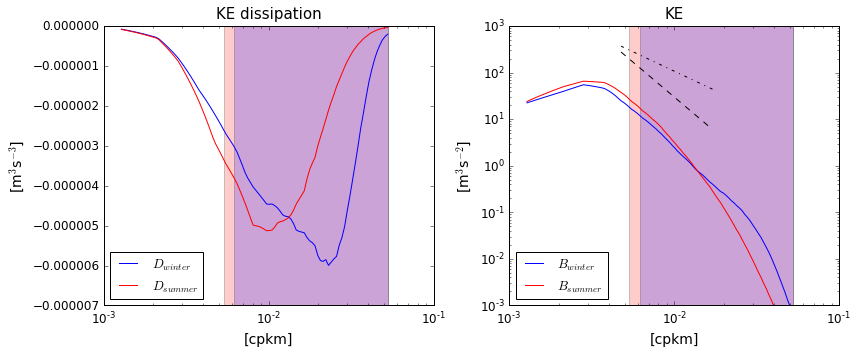

In [88]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax1.semilogx(k_NKnew*1e3, .5*KEdiss_specNKwin, 'b', label=r'$D_{winter}$')
ax1.semilogx(k_NKnew*1e3, .5*KEdiss_specNKsum, 'r', label=r'$D_{summer}$')
ax1.fill_between(k_NKnew[ik_NKsum:]*1e3, 
                 np.zeros(len(k_NKnew[ik_NKsum:])), -7e-6*np.ones(len(k_NKnew[ik_NKsum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_NKnew[ik_NKwin:]*1e3, 
                 np.zeros(len(k_NKnew[ik_NKwin:])), -7e-6*np.ones(len(k_NKnew[ik_NKwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE dissipation', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-3}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([-7e-6, 0.])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax1 = fig.add_subplot(122)
ax1.loglog(k_NKnew*1e3, .5*KE_specNKwin, 'b', label=r'$B_{winter}$')
ax1.loglog(k_NKnew*1e3, .5*KE_specNKsum, 'r', label=r'$B_{summer}$')
ax1.loglog(k_NKnew[35:70]*1e3, k_NKnew[35:70]**-3*3e-14, 'k--')
ax1.loglog(k_NKnew[35:70]*1e3, k_NKnew[35:70]**(-5./3.)*5e-7, 'k-.')
ax1.fill_between(k_NKnew[ik_NKsum:]*1e3, 
                 1e-3*np.ones(len(k_NKnew[ik_NKsum:])), 1e3*np.ones(len(k_NKnew[ik_NKsum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_NKnew[ik_NKwin:]*1e3, 
                 1e-3*np.ones(len(k_NKnew[ik_NKwin:])), 1e3*np.ones(len(k_NKnew[ik_NKwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-3, 1e3])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

plt.tight_layout()

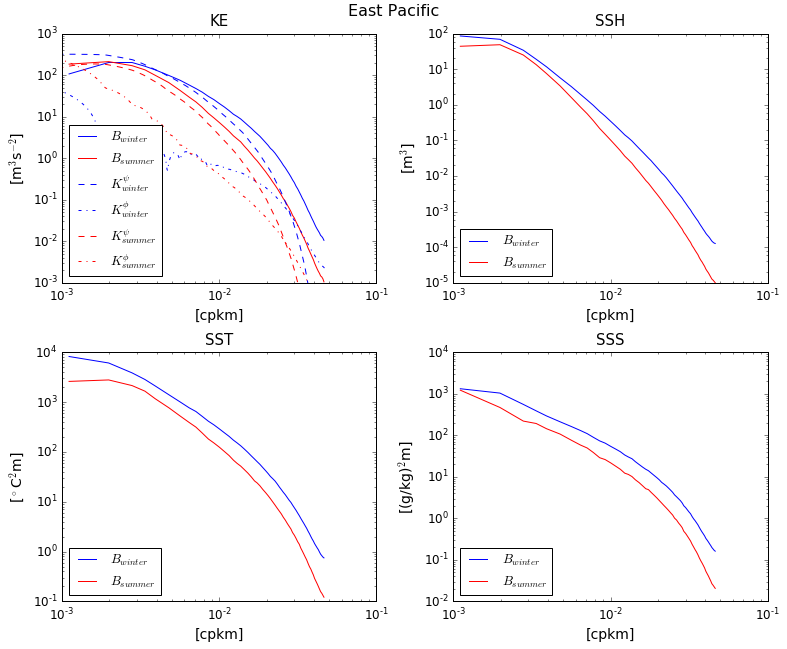

In [113]:
fig = plt.figure(figsize=(11,9))

ax1 = fig.add_subplot(221)
ax1.loglog(K_EP[:-1]*1e3, 2*.5*(uPSD_EPwin + vPSD_EPwin)[:-1], 'b', label=r'$B_{winter}$')
ax1.loglog(K_EP[:-1]*1e3, 2*.5*(uPSD_EPsum + vPSD_EPsum)[:-1], 'r', label=r'$B_{summer}$')
ax1.loglog(Krotdiv_EP[:]*1e3, Kpsi_EPwin[:], 'b--', label=r'$K^{\psi}_{winter}$')
ax1.loglog(Krotdiv_EP[:]*1e3, Kphi_EPwin[:], 'b-.', label=r'$K^{\phi}_{winter}$')
ax1.loglog(Krotdiv_EP[:]*1e3, Kpsi_EPsum[:], 'r--', label=r'$K^{\psi}_{summer}$')
ax1.loglog(Krotdiv_EP[:]*1e3, Kphi_EPsum[:], 'r-.', label=r'$K^{\phi}_{summer}$')
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-3, 1e3])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax2 = fig.add_subplot(222)
ax2.loglog(K_EP[:-1]*1e3, 2*sshPSD_EPwin[:-1], 'b', label=r'$B_{winter}$')
ax2.loglog(K_EP[:-1]*1e3, 2*sshPSD_EPsum[:-1], 'r', label=r'$B_{summer}$')
ax2.set_title(r'SSH', fontsize=15, y=1.01)
ax2.set_xlabel(r'[cpkm]', fontsize=14)
ax2.set_ylabel(r'[m$^3$]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax3 = fig.add_subplot(223)
ax3.loglog(K_EP[:-1]*1e3, 2*sstPSD_EPwin[:-1], 'b', label=r'$B_{winter}$')
ax3.loglog(K_EP[:-1]*1e3, 2*sstPSD_EPsum[:-1], 'r', label=r'$B_{summer}$')
ax3.set_title(r'SST', fontsize=15, y=1.01)
ax3.set_xlabel(r'[cpkm]', fontsize=14)
ax3.set_ylabel(r'[$^\circ$C$^2$m]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax4 = fig.add_subplot(224)
ax4.loglog(K_EP[:-1]*1e3, 2*sssPSD_EPwin[:-1], 'b', label=r'$B_{winter}$')
ax4.loglog(K_EP[:-1]*1e3, 2*sssPSD_EPsum[:-1], 'r', label=r'$B_{summer}$')
ax4.set_title(r'SSS', fontsize=15, y=1.01)
ax4.set_xlabel(r'[cpkm]', fontsize=14)
ax4.set_ylabel(r'[(g/kg)$^2$m]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

# plt.suptitle('East Pacific', fontsize=16, y=1.01)
fig.get_axes()[0].annotate('East Pacific', (0.5, 0.975), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
plt.tight_layout()
plt.savefig('EastPacific_spectra_seasonal.png', box_axis='tight')

In [89]:
k_EPnew = np.logspace(np.log10(np.nanmin(k_EP[2:-1])), np.log10(np.nanmax(k_EP[2:-1])), num=100)

f = naiso.interp1d(k_EP[2:-1], (uPSD_EPwin + vPSD_EPwin)[2:-1], fill_value='extrapolate')
KE_specEPwin = f(k_EPnew)
f = naiso.interp1d(k_EP[2:-1], (udissPSD_EPwin + vdissPSD_EPwin)[2:-1], fill_value='extrapolate')
KEdiss_specEPwin = f(k_EPnew)

f = naiso.interp1d(k_EP[2:-1], (uPSD_EPsum + vPSD_EPsum)[2:-1], fill_value='extrapolate')
KE_specEPsum = f(k_EPnew)
f = naiso.interp1d(k_EP[2:-1], (udissPSD_EPsum + vdissPSD_EPsum)[2:-1], fill_value='extrapolate')
KEdiss_specEPsum = f(k_EPnew)

In [90]:
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specEPwin[ik:])
                                 /np.nansum(KEdiss_specEPwin)) - .8)
    if diff > 0.:
        ik_EPwin = ik
        break
        
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specEPsum[ik:])
                                 /np.nansum(KEdiss_specEPsum)) - .8)
    if diff > 0.:
        ik_EPsum = ik
        break

print ik_EPwin, ik_EPsum

52 46


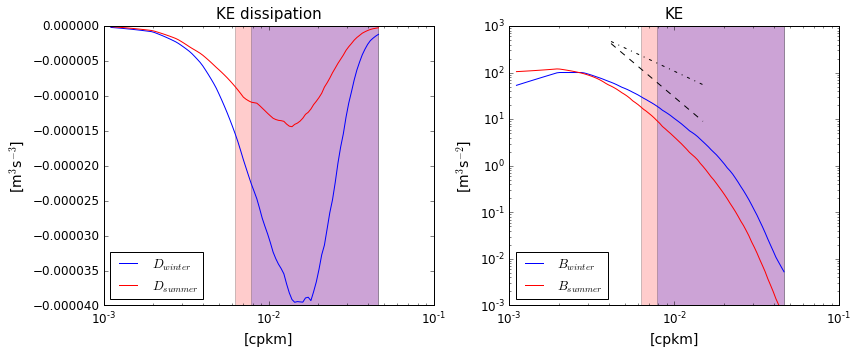

In [91]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax1.semilogx(k_EPnew*1e3, .5*KEdiss_specEPwin, 'b', label=r'$D_{winter}$')
ax1.semilogx(k_EPnew*1e3, .5*KEdiss_specEPsum, 'r', label=r'$D_{summer}$')
ax1.fill_between(k_EPnew[ik_EPsum:]*1e3, 
                 np.zeros(len(k_EPnew[ik_EPsum:])), -4e-5*np.ones(len(k_EPnew[ik_EPsum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_EPnew[ik_EPwin:]*1e3, 
                 np.zeros(len(k_EPnew[ik_EPwin:])), -4e-5*np.ones(len(k_EPnew[ik_EPwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE dissipation', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-3}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([-4e-5, 0.])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax1 = fig.add_subplot(122)
ax1.loglog(k_EPnew*1e3, .5*KE_specEPwin, 'b', label=r'$B_{winter}$')
ax1.loglog(k_EPnew*1e3, .5*KE_specEPsum, 'r', label=r'$B_{summer}$')
ax1.loglog(k_EPnew[35:70]*1e3, k_EPnew[35:70]**-3*3e-14, 'k--')
ax1.loglog(k_EPnew[35:70]*1e3, k_EPnew[35:70]**(-5./3.)*5e-7, 'k-.')
ax1.fill_between(k_EPnew[ik_EPsum:]*1e3, 
                 1e-3*np.ones(len(k_EPnew[ik_EPsum:])), 1e3*np.ones(len(k_EPnew[ik_EPsum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_EPnew[ik_EPwin:]*1e3, 
                 1e-3*np.ones(len(k_EPnew[ik_EPwin:])), 1e3*np.ones(len(k_EPnew[ik_EPwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-3, 1e3])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

plt.tight_layout()

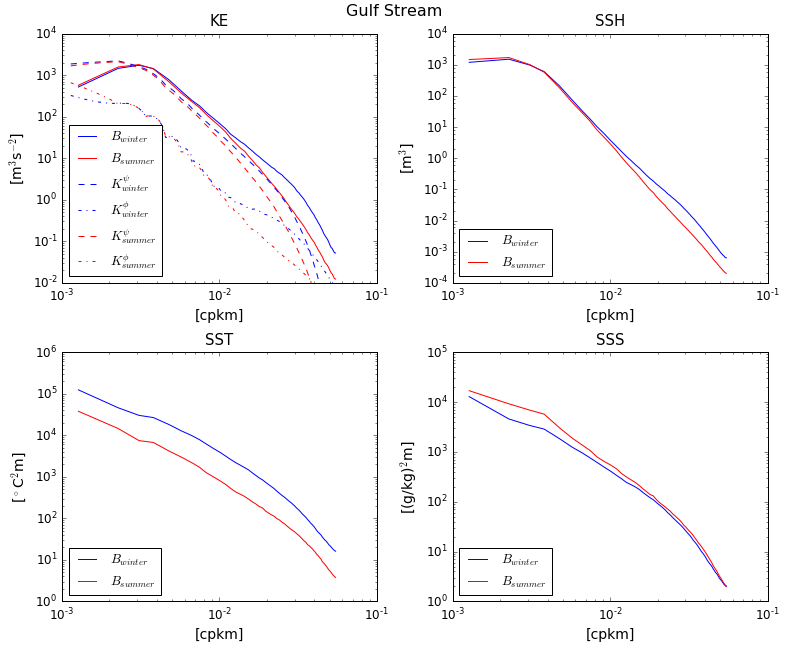

In [114]:
fig = plt.figure(figsize=(11,9))

ax1 = fig.add_subplot(221)
ax1.loglog(K_GS[:-1]*1e3, 2*.5*(uPSD_GSwin + vPSD_GSwin)[:-1], 'b', label=r'$B_{winter}$')
ax1.loglog(K_GS[:-1]*1e3, 2*.5*(uPSD_GSsum + vPSD_GSsum)[:-1], 'r', label=r'$B_{summer}$')
ax1.loglog(Krotdiv_GS[:]*1e3, Kpsi_GSwin[:], 'b--', label=r'$K^{\psi}_{winter}$')
ax1.loglog(Krotdiv_GS[:]*1e3, Kphi_GSwin[:], 'b-.', label=r'$K^{\phi}_{winter}$')
ax1.loglog(Krotdiv_GS[:]*1e3, Kpsi_GSsum[:], 'r--', label=r'$K^{\psi}_{summer}$')
ax1.loglog(Krotdiv_GS[:]*1e3, Kphi_GSsum[:], 'r-.', label=r'$K^{\phi}_{summer}$')
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax2 = fig.add_subplot(222)
ax2.loglog(K_GS[:-1]*1e3, 2*sshPSD_GSwin[:-1], 'b', label=r'$B_{winter}$')
ax2.loglog(K_GS[:-1]*1e3, 2*sshPSD_GSsum[:-1], 'r', label=r'$B_{summer}$')
ax2.set_title(r'SSH', fontsize=15, y=1.01)
ax2.set_xlabel(r'[cpkm]', fontsize=14)
ax2.set_ylabel(r'[m$^3$]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax3 = fig.add_subplot(223)
ax3.loglog(K_GS[:-1]*1e3, 2*sstPSD_GSwin[:-1], 'b', label=r'$B_{winter}$')
ax3.loglog(K_GS[:-1]*1e3, 2*sstPSD_GSsum[:-1], 'r', label=r'$B_{summer}$')
ax3.set_title(r'SST', fontsize=15, y=1.01)
ax3.set_xlabel(r'[cpkm]', fontsize=14)
ax3.set_ylabel(r'[$^\circ$C$^2$m]', fontsize=14)
ax3.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax4 = fig.add_subplot(224)
ax4.loglog(K_GS[:-1]*1e3, 2*sssPSD_GSwin[:-1], 'b', label=r'$B_{winter}$')
ax4.loglog(K_GS[:-1]*1e3, 2*sssPSD_GSsum[:-1], 'r', label=r'$B_{summer}$')
ax4.set_title(r'SSS', fontsize=15, y=1.01)
ax4.set_xlabel(r'[cpkm]', fontsize=14)
ax4.set_ylabel(r'[(g/kg)$^2$m]', fontsize=14)
ax4.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

# plt.suptitle('Gulf Stream', fontsize=16, y=1.01)
fig.get_axes()[0].annotate('Gulf Stream', (0.5, 0.975), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
plt.tight_layout()
plt.savefig('GulfStream_spectra_seasonal.png', box_axis='tight')

In [92]:
k_GSnew = np.logspace(np.log10(np.nanmin(k_GS[2:-1])), np.log10(np.nanmax(k_GS[2:-1])), num=100)

f = naiso.interp1d(k_GS[2:-1], (uPSD_GSwin + vPSD_GSwin)[2:-1], fill_value='extrapolate')
KE_specGSwin = f(k_GSnew)
f = naiso.interp1d(k_GS[2:-1], (udissPSD_GSwin + vdissPSD_GSwin)[2:-1], fill_value='extrapolate')
KEdiss_specGSwin = f(k_GSnew)

f = naiso.interp1d(k_GS[2:-1], (uPSD_GSsum + vPSD_GSsum)[2:-1], fill_value='extrapolate')
KE_specGSsum = f(k_GSnew)
f = naiso.interp1d(k_GS[2:-1], (udissPSD_GSsum + vdissPSD_GSsum)[2:-1], fill_value='extrapolate')
KEdiss_specGSsum = f(k_GSnew)

In [93]:
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specGSwin[ik:])
                                 /np.nansum(KEdiss_specGSwin)) - .8)
    if diff > 0.:
        ik_GSwin = ik
        break
        
for ik in range(100,0, -1):
    diff = ((np.nansum(KEdiss_specGSsum[ik:])
                                 /np.nansum(KEdiss_specGSsum)) - .8)
    if diff > 0.:
        ik_GSsum = ik
        break

print ik_GSwin, ik_GSsum

41 38


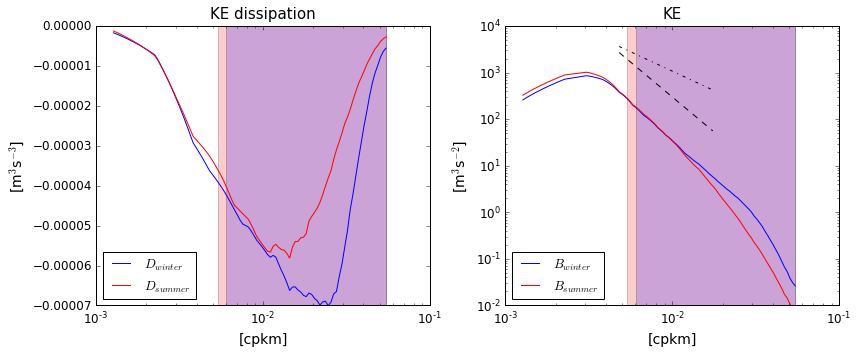

In [96]:
fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121)
ax1.semilogx(k_GSnew*1e3, .5*KEdiss_specGSwin, 'b', label=r'$D_{winter}$')
ax1.semilogx(k_GSnew*1e3, .5*KEdiss_specGSsum, 'r', label=r'$D_{summer}$')
ax1.fill_between(k_GSnew[ik_GSsum:]*1e3, 
                 np.zeros(len(k_GSnew[ik_GSsum:])), -7e-5*np.ones(len(k_GSnew[ik_GSsum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_GSnew[ik_GSwin:]*1e3, 
                 np.zeros(len(k_GSnew[ik_GSwin:])), -7e-5*np.ones(len(k_GSnew[ik_GSwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE dissipation', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-3}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([-7e-5, 0.])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax1 = fig.add_subplot(122)
ax1.loglog(k_GSnew*1e3, .5*KE_specGSwin, 'b', label=r'$B_{winter}$')
ax1.loglog(k_GSnew*1e3, .5*KE_specGSsum, 'r', label=r'$B_{summer}$')
ax1.loglog(k_GSnew[35:70]*1e3, k_GSnew[35:70]**-3*3e-13, 'k--')
ax1.loglog(k_GSnew[35:70]*1e3, k_GSnew[35:70]**(-5./3.)*5e-6, 'k-.')
ax1.fill_between(k_GSnew[ik_GSsum:]*1e3, 
                 1e-2*np.ones(len(k_GSnew[ik_GSsum:])), 1e4*np.ones(len(k_GSnew[ik_GSsum:])),
                facecolor='red', alpha=0.2)
ax1.fill_between(k_GSnew[ik_GSwin:]*1e3, 
                 1e-2*np.ones(len(k_EPnew[ik_GSwin:])), 1e4*np.ones(len(k_EPnew[ik_GSwin:])),
                facecolor='blue', alpha=0.2)
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

plt.tight_layout()

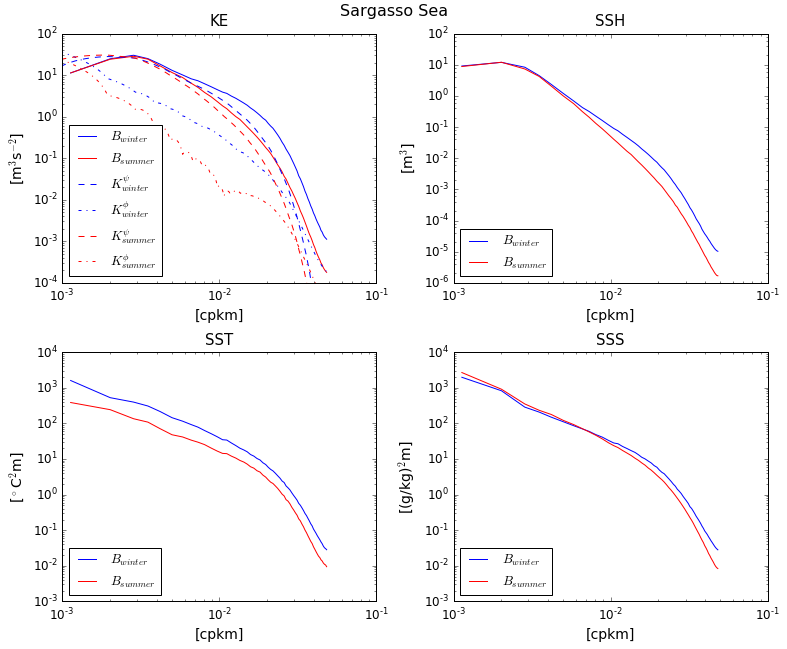

In [115]:
fig = plt.figure(figsize=(11,9))

ax1 = fig.add_subplot(221)
ax1.loglog(K_Sar[:-1]*1e3, 2*.5*(uPSD_Sarwin + vPSD_Sarwin)[:-1], 'b', label=r'$B_{winter}$')
ax1.loglog(K_Sar[:-1]*1e3, 2*.5*(uPSD_Sarsum + vPSD_Sarsum)[:-1], 'r', label=r'$B_{summer}$')
ax1.loglog(Krotdiv_Sar[:]*1e3, Kpsi_Sarwin[:], 'b--', label=r'$K^{\psi}_{winter}$')
ax1.loglog(Krotdiv_Sar[:]*1e3, Kphi_Sarwin[:], 'b-.', label=r'$K^{\phi}_{winter}$')
ax1.loglog(Krotdiv_Sar[:]*1e3, Kpsi_Sarsum[:], 'r--', label=r'$K^{\psi}_{summer}$')
ax1.loglog(Krotdiv_Sar[:]*1e3, Kphi_Sarsum[:], 'r-.', label=r'$K^{\phi}_{summer}$')
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-4, 1e2])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax2 = fig.add_subplot(222)
ax2.loglog(K_Sar[:-1]*1e3, 2*sshPSD_Sarwin[:-1], 'b', label=r'$B_{winter}$')
ax2.loglog(K_Sar[:-1]*1e3, 2*sshPSD_Sarsum[:-1], 'r', label=r'$B_{summer}$')
ax2.set_title(r'SSH', fontsize=15, y=1.01)
ax2.set_xlabel(r'[cpkm]', fontsize=14)
ax2.set_ylabel(r'[m$^3$]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax3 = fig.add_subplot(223)
ax3.loglog(K_Sar[:-1]*1e3, 2*sstPSD_Sarwin[:-1], 'b', label=r'$B_{winter}$')
ax3.loglog(K_Sar[:-1]*1e3, 2*sstPSD_Sarsum[:-1], 'r', label=r'$B_{summer}$')
ax3.set_title(r'SST', fontsize=15, y=1.01)
ax3.set_xlabel(r'[cpkm]', fontsize=14)
ax3.set_ylabel(r'[$^\circ$C$^2$m]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax4 = fig.add_subplot(224)
ax4.loglog(K_Sar[:-1]*1e3, 2*sssPSD_Sarwin[:-1], 'b', label=r'$B_{winter}$')
ax4.loglog(K_Sar[:-1]*1e3, 2*sssPSD_Sarsum[:-1], 'r', label=r'$B_{summer}$')
ax4.set_title(r'SSS', fontsize=15, y=1.01)
ax4.set_xlabel(r'[cpkm]', fontsize=14)
ax4.set_ylabel(r'[(g/kg)$^2$m]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

# plt.suptitle('Sargasso Sea', fontsize=16, y=1.01)
fig.get_axes()[0].annotate('Sargasso Sea', (0.5, 0.975), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
plt.tight_layout()
plt.savefig('SargassoSea_spectra_seasonal.png', box_axis='tight')

In [97]:
k_Sarnew = np.logspace(np.log10(np.nanmin(k_Sar[2:-1])), np.log10(np.nanmax(k_Sar[2:-1])), num=100)

f = naiso.interp1d(k_Sar[2:-1], (uPSD_Sarwin + vPSD_Sarwin)[2:-1], fill_value='extrapolate')
KE_specSarwin = f(k_Sarnew)
f = naiso.interp1d(k_Sar[2:-1], (udissPSD_Sarwin + vdissPSD_Sarwin)[2:-1], fill_value='extrapolate')
KEdiss_specSarwin = f(k_Sarnew)

f = naiso.interp1d(k_Sar[2:-1], (uPSD_Sarsum + vPSD_Sarsum)[2:-1], fill_value='extrapolate')
KE_specSarsum = f(k_Sarnew)
f = naiso.interp1d(k_Sar[2:-1], (udissPSD_Sarsum + vdissPSD_Sarsum)[2:-1], fill_value='extrapolate')
KEdiss_specSarsum = f(k_Sarnew)

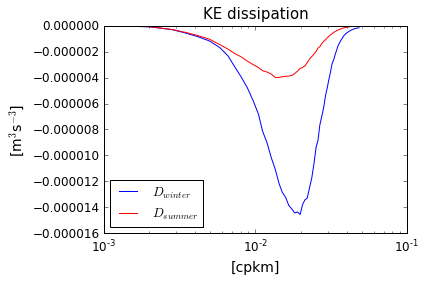

In [29]:
fig = plt.figure(figsize=(6,4))

ax1 = plt.gca()
ax1.semilogx(k_Sar[:-1]*1e3, .5*(udissPSD_Sarwin + vdissPSD_Sarwin)[:-1], 'b', label=r'$D_{winter}$')
ax1.semilogx(k_Sar[:-1]*1e3, .5*(udissPSD_Sarsum + vdissPSD_Sarsum)[:-1], 'r', label=r'$D_{summer}$')
ax1.set_title(r'KE dissipation', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-3}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
# ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)
plt.tight_layout()

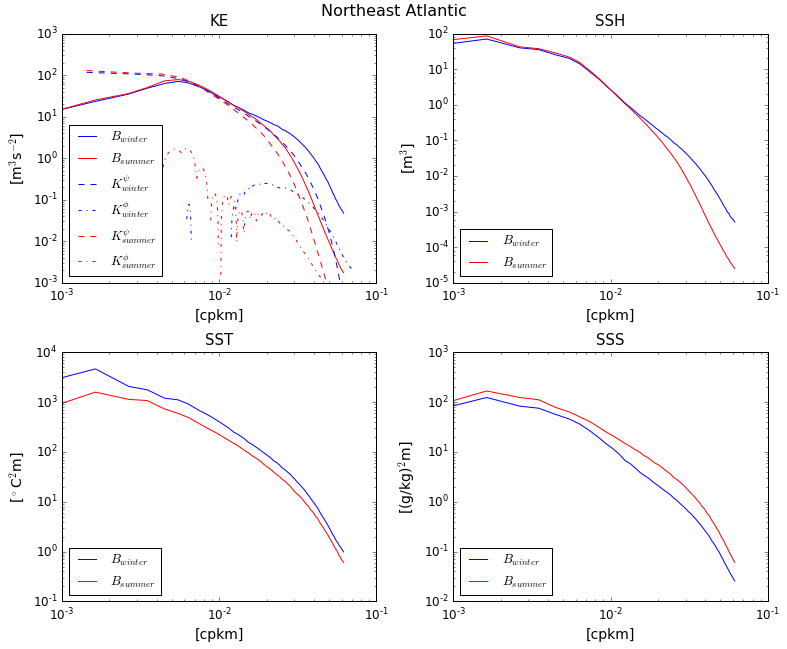

In [116]:
fig = plt.figure(figsize=(11,9))

ax1 = fig.add_subplot(221)
ax1.loglog(k_NEAt[:-1]*1e3, 2*.5*(uPSD_NEAtwin + vPSD_NEAtwin)[:-1], 'b', label=r'$B_{winter}$')
ax1.loglog(k_NEAt[:-1]*1e3, 2*.5*(uPSD_NEAtsum + vPSD_NEAtsum)[:-1], 'r', label=r'$B_{summer}$')
ax1.loglog(krotdiv_NEAt[:]*1e3, Kpsi_NEAtwin[:], 'b--', label=r'$K^{\psi}_{winter}$')
ax1.loglog(krotdiv_NEAt[:]*1e3, Kphi_NEAtwin[:], 'b-.', label=r'$K^{\phi}_{winter}$')
ax1.loglog(krotdiv_NEAt[:]*1e3, Kpsi_NEAtsum[:], 'r--', label=r'$K^{\psi}_{summer}$')
ax1.loglog(krotdiv_NEAt[:]*1e3, Kphi_NEAtsum[:], 'r-.', label=r'$K^{\phi}_{summer}$')
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-3, 1e3])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax2 = fig.add_subplot(222)
ax2.loglog(k_NEAt[:-1]*1e3, 2*sshPSD_NEAtwin[:-1], 'b', label=r'$B_{winter}$')
ax2.loglog(k_NEAt[:-1]*1e3, 2*sshPSD_NEAtsum[:-1], 'r', label=r'$B_{summer}$')
ax2.set_title(r'SSH', fontsize=15, y=1.01)
ax2.set_xlabel(r'[cpkm]', fontsize=14)
ax2.set_ylabel(r'[m$^3$]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax3 = fig.add_subplot(223)
ax3.loglog(k_NEAt[:-1]*1e3, 2*sstPSD_NEAtwin[:-1], 'b', label=r'$B_{winter}$')
ax3.loglog(k_NEAt[:-1]*1e3, 2*sstPSD_NEAtsum[:-1], 'r', label=r'$B_{summer}$')
ax3.set_title(r'SST', fontsize=15, y=1.01)
ax3.set_xlabel(r'[cpkm]', fontsize=14)
ax3.set_ylabel(r'[$^\circ$C$^2$m]', fontsize=14)
ax3.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax4 = fig.add_subplot(224)
ax4.loglog(k_NEAt[:-1]*1e3, 2*sssPSD_NEAtwin[:-1], 'b', label=r'$B_{winter}$')
ax4.loglog(k_NEAt[:-1]*1e3, 2*sssPSD_NEAtsum[:-1], 'r', label=r'$B_{summer}$')
ax4.set_title(r'SSS', fontsize=15, y=1.01)
ax4.set_xlabel(r'[cpkm]', fontsize=14)
ax4.set_ylabel(r'[(g/kg)$^2$m]', fontsize=14)
ax4.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

# plt.suptitle('Northeast Atlantic', fontsize=16, y=1.01)
fig.get_axes()[0].annotate('Northeast Atlantic', (0.5, 0.975), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
plt.tight_layout()
plt.savefig('NortheastAtlantic_spectra_seasonal.png', box_axis='tight')

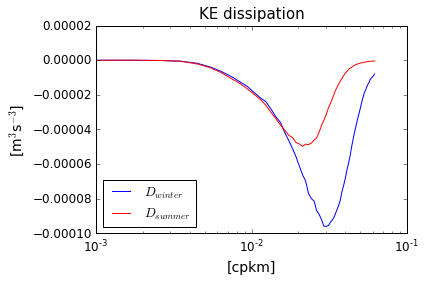

In [30]:
fig = plt.figure(figsize=(6,4))

ax1 = plt.gca()
ax1.semilogx(k_NEAt[:-1]*1e3, .5*(udissPSD_NEAtwin + vdissPSD_NEAtwin)[:-1], 'b', label=r'$D_{winter}$')
ax1.semilogx(k_NEAt[:-1]*1e3, .5*(udissPSD_NEAtsum + vdissPSD_NEAtsum)[:-1], 'r', label=r'$D_{summer}$')
ax1.set_title(r'KE dissipation', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-3}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
# ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)
plt.tight_layout()

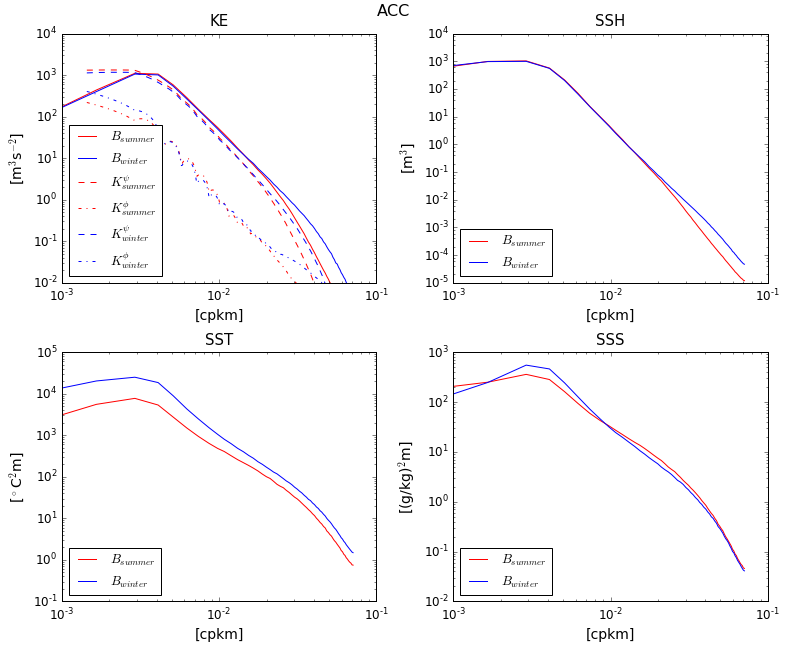

In [117]:
fig = plt.figure(figsize=(11,9))

ax1 = fig.add_subplot(221)
ax1.loglog(k_ACC[:-1]*1e3, 2*.5*(uPSD_ACCwin + vPSD_ACCwin)[:-1], 'r', label=r'$B_{summer}$')
ax1.loglog(k_ACC[:-1]*1e3, 2*.5*(uPSD_ACCsum + vPSD_ACCsum)[:-1], 'b', label=r'$B_{winter}$')
ax1.loglog(krotdiv_ACC[:]*1e3, Kpsi_ACCwin[:], 'r--', label=r'$K^{\psi}_{summer}$')
ax1.loglog(krotdiv_ACC[:]*1e3, Kphi_ACCwin[:], 'r-.', label=r'$K^{\phi}_{summer}$')
ax1.loglog(krotdiv_ACC[:]*1e3, Kpsi_ACCsum[:], 'b--', label=r'$K^{\psi}_{winter}$')
ax1.loglog(krotdiv_ACC[:]*1e3, Kphi_ACCsum[:], 'b-.', label=r'$K^{\phi}_{winter}$')
ax1.set_title(r'KE', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax2 = fig.add_subplot(222)
ax2.loglog(k_ACC[:-1]*1e3, 2*sshPSD_ACCwin[:-1], 'r', label=r'$B_{summer}$')
ax2.loglog(k_ACC[:-1]*1e3, 2*sshPSD_ACCsum[:-1], 'b', label=r'$B_{winter}$')
ax2.set_title(r'SSH', fontsize=15, y=1.01)
ax2.set_xlabel(r'[cpkm]', fontsize=14)
ax2.set_ylabel(r'[m$^3$]', fontsize=14)
ax2.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax3 = fig.add_subplot(223)
ax3.loglog(k_ACC[:-1]*1e3, 2*sstPSD_ACCwin[:-1], 'r', label=r'$B_{summer}$')
ax3.loglog(k_ACC[:-1]*1e3, 2*sstPSD_ACCsum[:-1], 'b', label=r'$B_{winter}$')
ax3.set_title(r'SST', fontsize=15, y=1.01)
ax3.set_xlabel(r'[cpkm]', fontsize=14)
ax3.set_ylabel(r'[$^\circ$C$^2$m]', fontsize=14)
ax3.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

ax4 = fig.add_subplot(224)
ax4.loglog(k_ACC[:-1]*1e3, 2*sssPSD_ACCwin[:-1], 'r', label=r'$B_{summer}$')
ax4.loglog(k_ACC[:-1]*1e3, 2*sssPSD_ACCsum[:-1], 'b', label=r'$B_{winter}$')
ax4.set_title(r'SSS', fontsize=15, y=1.01)
ax4.set_xlabel(r'[cpkm]', fontsize=14)
ax4.set_ylabel(r'[(g/kg)$^2$m]', fontsize=14)
ax4.set_xlim([1e-3, 1e-1])
# ax2.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)

# plt.suptitle('ACC', fontsize=16, y=1.01)
fig.get_axes()[0].annotate('ACC', (0.5, 0.975), 
                            xycoords='figure fraction', ha='center', 
                            fontsize=16
                            )
plt.tight_layout()
plt.savefig('ACC_spectra_seasonal.png', box_axis='tight')

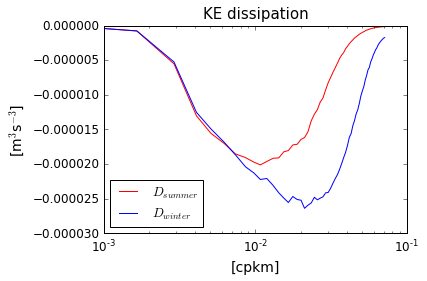

In [32]:
fig = plt.figure(figsize=(6,4))

ax1 = plt.gca()
ax1.semilogx(k_ACC[:-1]*1e3, .5*(udissPSD_ACCwin + vdissPSD_ACCwin)[:-1], 'r', label=r'$D_{summer}$')
ax1.semilogx(k_ACC[:-1]*1e3, .5*(udissPSD_ACCsum + vdissPSD_ACCsum)[:-1], 'b', label=r'$D_{winter}$')
ax1.set_title(r'KE dissipation', fontsize=15, y=1.01)
ax1.set_xlabel(r'[cpkm]', fontsize=14)
ax1.set_ylabel(r'[m$^3$s$^{-3}$]', fontsize=14)
ax1.set_xlim([1e-3, 1e-1])
# ax1.set_ylim([1e-2, 1e4])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='lower left', fontsize=13)
plt.tight_layout()

In [88]:
dkac_ACC = np.diff(kac_ACC)

Cv_ACCwinDev = - .5*(kac_ACC[1:]+kac_ACC[:-1]) * np.diff(Cu_ACCwin) * dkac_ACC**-1
Cv_ACCsumDev = - .5*(kac_ACC[1:]+kac_ACC[:-1]) * np.diff(Cu_ACCsum) * dkac_ACC**-1

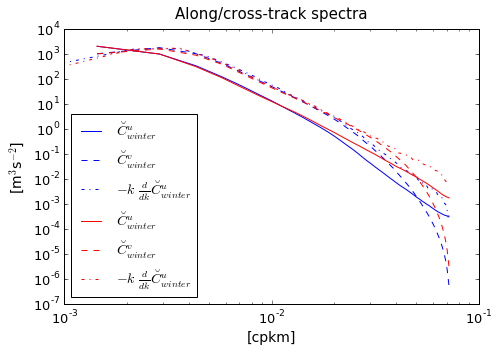

In [89]:
fig = plt.figure(figsize=(7,5))
ax = plt.gca()
ax.loglog(kac_ACC*1e3, Cu_ACCwin, 'b', label=r'$\breve{C}^u_{winter}$')
ax.loglog(kac_ACC*1e3, Cv_ACCwin, 'b--', label=r'$\breve{C}^v_{winter}$')
ax.loglog(.5*(kac_ACC[1:]+kac_ACC[:-1])*1e3, Cv_ACCwinDev, 'b-.', label=r'$-k\ \frac{d}{dk}\breve{C}^u_{winter}$')
ax.loglog(kac_ACC*1e3, Cu_ACCsum, 'r', label=r'$\breve{C}^u_{winter}$')
ax.loglog(kac_ACC*1e3, Cv_ACCsum, 'r--', label=r'$\breve{C}^v_{winter}$')
ax.loglog(.5*(kac_ACC[1:]+kac_ACC[:-1])*1e3, Cv_ACCsumDev, 'r-.', label=r'$-k\ \frac{d}{dk}\breve{C}^u_{winter}$')
ax.set_xlabel(r'[cpkm]', fontsize=14)
ax.set_ylabel(r'[m$^3$s$^{-2}$]', fontsize=14)
# ax.set_ylim([1e-2, 1e4])
ax.set_xlim([1e-3, 1e-1])
ax.set_title('Along/cross-track spectra', fontsize=15, y=1.02)
plt.legend(loc='lower left', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.savefig('ACC_alongcrossSpectra_seasonal.png')